# Covid-19 Dashboard

This dashboard explores data on COVID19 impacting the United Kingdom. Data has been extracted from the Public Health England website https://coronavirus.data.gov.uk.

In [5]:
#importing the data and relevant programs
from IPython.display import clear_output 
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [6]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [7]:
jsondata={}

In [8]:
from uk_covid19 import Cov19API

#filtering out other nations so only England is considered
filters = [
    'areaType=nation',
    'areaName=England'
]

#comparing hospital admissions, cases, and new deaths over time
structure = {
    "date": "date",
    "areaName": "areaName",
    "newAdmissions": "newAdmissions",
    "newCasesBySpecimenDate": "newCasesBySpecimenDate",
    "newDeaths28DaysByDeathDate": "newDeaths28DaysByDeathDate"
    
}
#setting up api
api = Cov19API(
    filters=filters,
    structure=structure,
)
#setting up time series
timeseries = api.get_json()

xml_data = api.get_xml()



In [9]:
#writing the json file
with open("timeseries.json", "wt") as OUTF:
    json.dump(timeseries, OUTF)

In [10]:
#reading the json file
with open("timeseries.json", "rt") as INFILE:
    data=json.load(INFILE)

In [11]:
#retrieving the data
datalist=data['data']

In [12]:
#retrieving and sorting the dates
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()

In [13]:
#converting date into datetime
def parse_date(datestring):
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [16]:
#identifying the start and end dates
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])


In [17]:
#defining the dataframe 
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['newAdmissions', 'newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate'])

In [21]:
for entry in datalist: 
    date=parse_date(entry['date'])
    for column in ['newAdmissions', 'newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate']:
        if pd.isna(timeseriesdf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0
            timeseriesdf.loc[date, column]=value
            
timeseriesdf.fillna(0.0, inplace=True)
            

##  Important Covid19 Variables Overtime

The two timeseries charts below depict how some of the most important impacts of Covid19 have been changing over time in England (Which had comparatively higher Covid19 numbers than other nations within the UK). The variables chosen are measured on a daily basis: hospital admissions, Covid19 cases and daily deaths. 

The first chart is a standard timeseries chart which shows the major peaks in the Winter months in Covid19 cases. It is clear that positive Covid19 cases far exceed hospital admissions and deaths. 

The following chart is a log which makes it easier to see how all 3 variables have behaved over time. While all 3 variables have the same peaks and dips as can be expected, there is a greater difference between cases and hospital admissions & deaths compared to earlier months in the Pandemic. This could indicate that Covid19 is becoming somewhat less deadly and causing less severe symptoms than it had been prior. 

<AxesSubplot:>

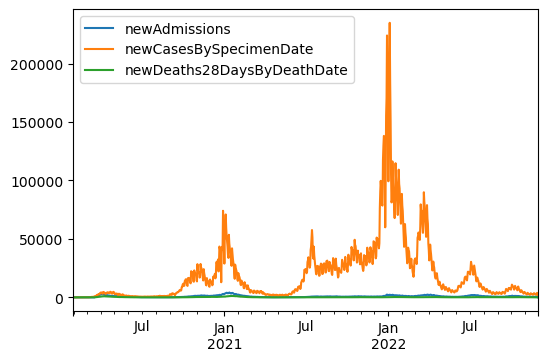

In [22]:
timeseriesdf.plot()

In [23]:
timeseriesdf.to_pickle("timeseriesdf.pkl")
timeseriesdf.to_pickle("agedf.pkl")

In [24]:
from IPython.display import clear_output
from ipywidgets import interactive,fixed, interact_manual, interact
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets


def f(option):
    timeseriesdf.loc[:,option].plot(logy = True)
interact (f,option=['newAdmissions', 'newCasesBySpecimenDate', 'newDeaths28DaysByDeathDate'])

interactive(children=(Dropdown(description='option', options=('newAdmissions', 'newCasesBySpecimenDate', 'newD…

<function __main__.f(option)>

In [25]:
def access_api(button):
  
    filters =['areaType=nation','areaName=England']
    structure = {
    "date": "date",
    "areaName": "areaName",
    "newAdmissions": "newAdmissions",
    "newCasesBySpecimenDate": "newCasesBySpecimenDate",
    "newDeaths28DaysByDeathDate": "newDeaths28DaysByDeathDate"
    }
    api = Cov19API(filters=filters, structure=structure)
    timeseriesdf=api.get_json()
   
    apibutton.icon="check"
    apibutton.disabled=True
   
apibutton=wdg.Button(
    description='Refresh',
    disabled=False,
    button_style='success', 
    tooltip='Click to download current Public Health England data',
    icon='download' 
    )


apibutton.on_click(access_api)

display(apibutton)

Button(button_style='success', description='Refresh', icon='download', style=ButtonStyle(), tooltip='Click to …

## Comparison of Male to Female Deaths within 28 Days of Positive Diagnosis

This chart compares the fatality of Covid in men relative to women. The variables male/female death within 28 days, measures the daily deaths of individuals who had tested positive for Covid19 just 28 days prior. The data has been filtered to represent England only.

Covid19 appears to be more fatal to men in every age group except for 90+ when it becomes more fatal for women. Women have a more expected relationship between Covid and age -- older age groups have more deaths than younger age groups whereas a smaller quantity of 90+ men have died from Covid compared to men from 80-89. This could be because women tend to live to be an older age so there is a higher population of women in their 90's compared to men. 

In [26]:
#importing the data and relevant programs

import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
agedistribution=api.get_json()
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
jsondata={}

from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [27]:

from uk_covid19 import Cov19API

#filtering to only include England data

filters = [
    'areaType=nation',
    'areaName=England'
]
#comparing deaths in men to women in 28 day periods
structure = {
    "date": "date",
    "femaleDeaths28Days": "femaleDeaths28Days",
    "maleDeaths28Days": "maleDeaths28Days"
    
}
#setting up api
api = Cov19API(
    filters=filters,
    structure=structure,
)


In [28]:
#reading json
with open("agedistribution.json", "rt") as INFILE:
    data=json.load(INFILE)

In [29]:
#retrieving the data
datalist=data['data']


In [30]:
datadic=data['data'][0] 

In [31]:
#list for men and women
femaleDeaths28Days=datadic['femaleDeaths28Days']
maleDeaths28Days=datadic["maleDeaths28Days"]

In [33]:
#creating age ranges
ageranges=[x['age'] for x in maleDeaths28Days] 


In [34]:
#extracting lower limit of age band
def min_age(agerange):
    agerange=agerange.replace('+','') 
    start=agerange.split('_')[0]
    return int(start)



In [36]:
#sorting age bands
ageranges.sort(key=min_age)


In [37]:
#creating dateframe
age_df=pd.DataFrame(index=ageranges, columns=['femaleDeaths28Days',"maleDeaths28Days", 'total'])

In [38]:
#matching deaths to age bands
for entry in femaleDeaths28Days: 
    ageband=entry['age']
    age_df.loc[ageband, 'femaleDeaths28Days']=entry['value']
    
for entry in maleDeaths28Days:
    ageband=entry['age']
    age_df.loc[ageband, "maleDeaths28Days"]=entry['value']
    
age_df['total']=age_df['femaleDeaths28Days']+age_df["maleDeaths28Days"]

In [39]:
#saving pickles for the charts so far
timeseriesdf.to_pickle("timeseriesdf.pkl")
age_df.to_pickle("agedf.pkl")


In [40]:
#importing widgets and matplotlib
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
#enlarging figure
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [42]:
#reading the pickle
age_df=pd.read_pickle("agedf.pkl")

In [43]:
agecols=wdg.SelectMultiple(
    options=['femaleDeaths28Days','maleDeaths28Days'],
    value=['femaleDeaths28Days', 'maleDeaths28Days'], 
    rows=3,
    description='Sex',
    disabled=False
)

def age_graph(graphcolumns):
    ncols=len(graphcolumns)
    if ncols>0:
        age_df.plot(kind='bar', y=list(graphcolumns))
        plt.show() 
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")
    
output=wdg.interactive_output(age_graph, {'graphcolumns': agecols})

display(agecols, output)

SelectMultiple(description='Sex', index=(0, 1), options=('femaleDeaths28Days', 'maleDeaths28Days'), rows=3, va…

Output()

In [44]:
def access_api(button):
  
    filters =['areaType=nation','areaName=England']
    structure = {
    "date": "date",
    "femaleDeaths28Days": "femaleDeaths28Days",
    "maleDeaths28Days": "maleDeaths28Days"
    }
    api = Cov19API(filters=filters, structure=structure)
    age_df=api.get_json()
   
    apibutton.icon="check"
    apibutton.disabled=True
   
apibutton=wdg.Button(
    description='Refresh',
    disabled=False,
    button_style='success', 
    tooltip='Click to download current Public Health England data',
    icon='download' 
    )


apibutton.on_click(access_api)

display(apibutton)

Button(button_style='success', description='Refresh', icon='download', style=ButtonStyle(), tooltip='Click to …

## Covid Cases Compared between Nations in the UK

The final graph is a comparison of daily covid tests compared between England, Scotland, Northern Ireland, Wales. 

In [45]:
#importing the data and relevant programs
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [46]:
from uk_covid19 import Cov19API


filters = [
    'areaType=nation'
]

structure = {
    "date": "date",
    "areaName": "areaName",
    "newCasesBySpecimenDate": "newCasesBySpecimenDate"
    
}

api = Cov19API(
    filters=filters,
    structure=structure,
)

region = api.get_json()

xml_data = api.get_xml()



In [47]:
with open("region.json", "wt") as OUTF:
    json.dump(region, OUTF)

In [48]:
with open("region.json", "rt") as INFILE:
    data=json.load(INFILE)

In [49]:
datalist=data['data']
region_data= pd.DataFrame(datalist)


In [50]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()


In [51]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [53]:
region_df = region_data.pivot(index="date", columns='areaName', values='newCasesBySpecimenDate')



In [56]:
region_df.fillna(0, inplace=True) 

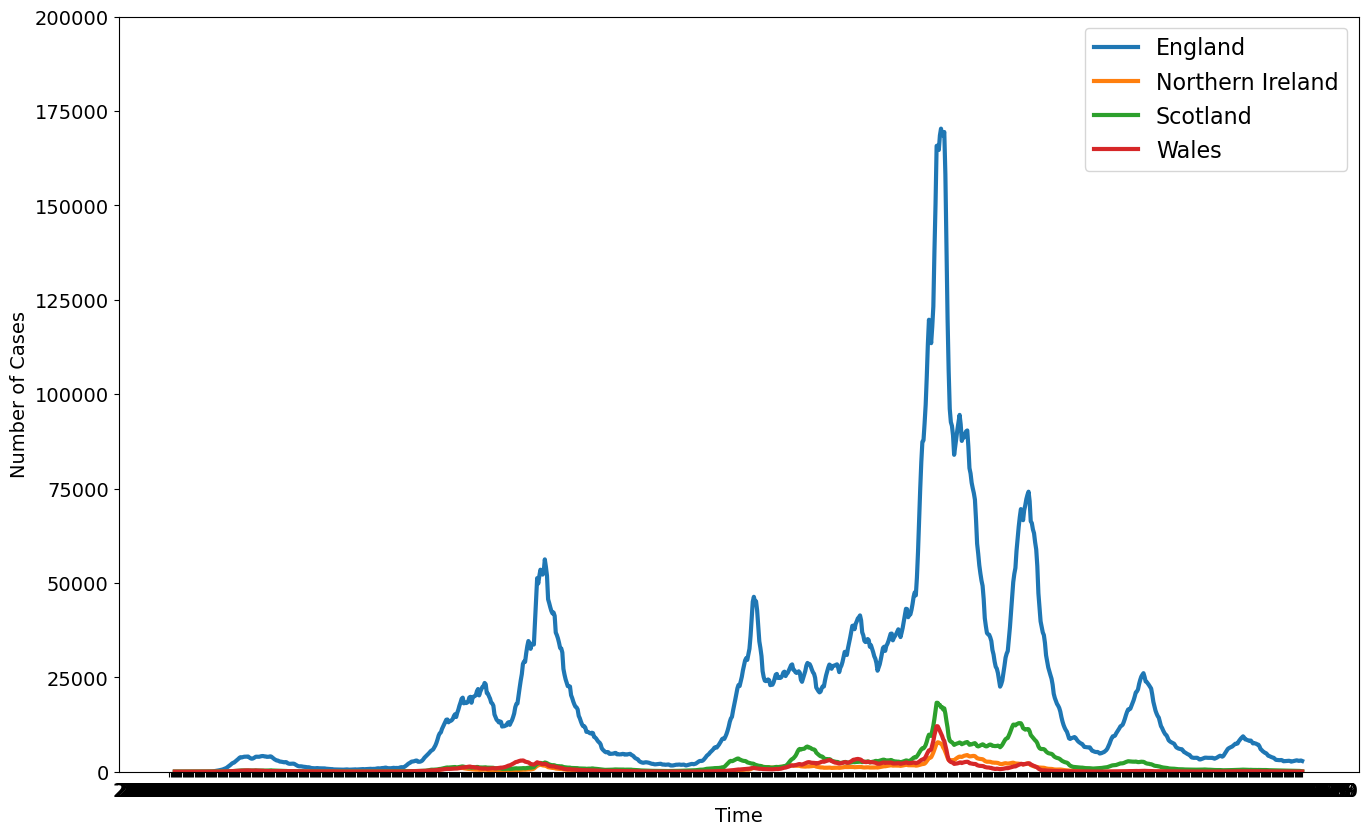

In [66]:


roll_df = region_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time' , fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.ylim(0, 200000)
 
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

In [58]:
def access_api(button):
  
    filters =['areaType=nation']
    structure = {
    "date": "date",
    "areaName": "areaName",
    "newCasesBySpecimenDate": "newCasesBySpecimenDate"
    }
    api = Cov19API(filters=filters, structure=structure)
    region_df=api.get_json()
   
    apibutton.icon="check"
    apibutton.disabled=True
   
apibutton=wdg.Button(
    description='Refresh',
    disabled=False,
    button_style='success', 
    tooltip='Click to download current Public Health England data',
    icon='download' 
    )


apibutton.on_click(access_api)

display(apibutton)

Button(button_style='success', description='Refresh', icon='download', style=ButtonStyle(), tooltip='Click to …